In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
top_50_APT_df = pd.read_csv('top_50_APT.csv')
top_50_CA_df = pd.read_csv('top_50_CA.csv')
rnd_50_APT_df = pd.read_csv('rnd_50_APT.csv')
rnd_50_CA_of_100_df = pd.read_csv('rnd_50_CA_of_100.csv')
rnd_50_CA_of_500_df = pd.read_csv('rnd_50_CA_of_500.csv')

In [7]:
# Function to calculate turnover
def calculate_turnover(df):
    turnover = []
    
    for i in range(2, df.shape[1]): 
        current_month = df.columns[i]
        previous_month = df.columns[i - 1]
        
        current_stocks = set(df.loc[df[current_month].notna(), 'permno'].values)
        previous_stocks = set(df.loc[df[previous_month].notna(), 'permno'].values)
        
        num_diff_stocks = len(current_stocks.symmetric_difference(previous_stocks))
        avg_num_stocks = (len(current_stocks) + len(previous_stocks)) / 2
        
        turnover_value = num_diff_stocks / avg_num_stocks
        turnover.append(turnover_value)
    
    return turnover

# Calculate turnover for each dataset
turnover_dict_APT = {
    'top_50_APT': calculate_turnover(top_50_APT_df),
    'rnd_50_APT': calculate_turnover(rnd_50_APT_df)
}

turnover_dict_CA = {
    'top_50_CA': calculate_turnover(top_50_CA_df),
    'rnd_50_CA_of_100': calculate_turnover(rnd_50_CA_of_100_df),
    'rnd_50_CA_of_500': calculate_turnover(rnd_50_CA_of_500_df)
}

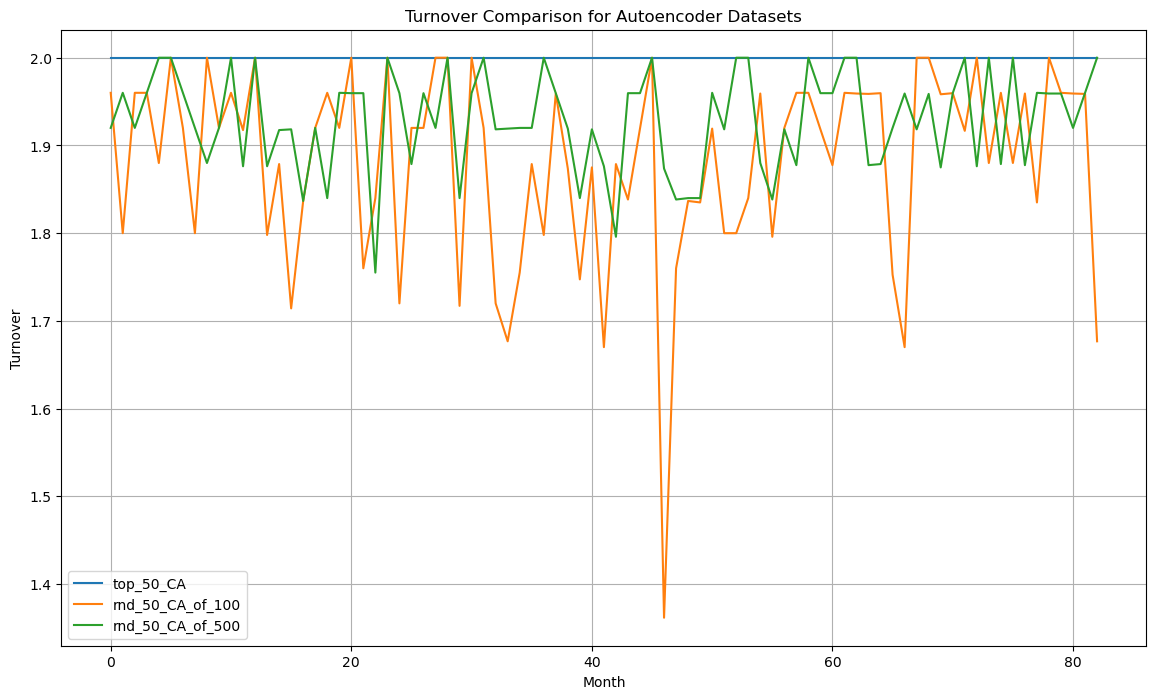

In [8]:
# Plot the results for Autoencoder datasets
plt.figure(figsize=(14, 8))
for name, turnover in turnover_dict_CA.items():
    plt.plot(turnover, label=name)

plt.xlabel('Month')
plt.ylabel('Turnover')
plt.title('Turnover Comparison for Autoencoder Datasets')
plt.legend()
plt.grid(True)
plt.show()

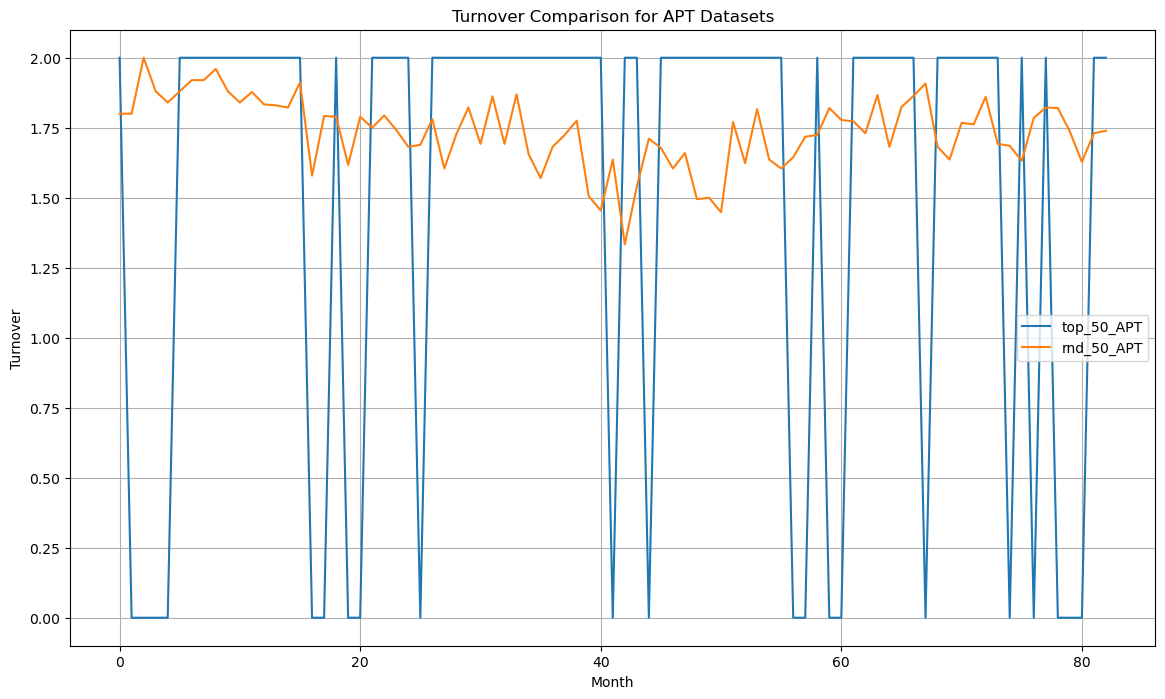

In [9]:
# Plot the results for APT datasets
plt.figure(figsize=(14, 8))
for name, turnover in turnover_dict_APT.items():
    plt.plot(turnover, label=name)

plt.xlabel('Month')
plt.ylabel('Turnover')
plt.title('Turnover Comparison for APT Datasets')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Function to calculate unique stocks
def calculate_unique_stocks(df):
    unique_stocks = set()
    
    for i in range(2, df.shape[1]):
        current_month = df.columns[i]
        
        current_stocks = set(df.loc[df[current_month].notna(), 'permno'].values)
        unique_stocks.update(current_stocks)
    
    return len(unique_stocks)


In [12]:
# Calculate unique stocks for each dataset
unique_stocks_dict = {
    'top_50_APT': calculate_unique_stocks(top_50_APT_df),
    'rnd_50_APT': calculate_unique_stocks(rnd_50_APT_df),
    'top_50_CA': calculate_unique_stocks(top_50_CA_df),
    'rnd_50_CA_of_100': calculate_unique_stocks(rnd_50_CA_of_100_df),
    'rnd_50_CA_of_500': calculate_unique_stocks(rnd_50_CA_of_500_df)
}

In [13]:
# Print the number of unique stocks for each dataset
for name, unique_stocks in unique_stocks_dict.items():
    print(f'Total Unique Stocks for {name}: {unique_stocks}')

Total Unique Stocks for top_50_APT: 52
Total Unique Stocks for rnd_50_APT: 1486
Total Unique Stocks for top_50_CA: 78
Total Unique Stocks for rnd_50_CA_of_100: 1935
Total Unique Stocks for rnd_50_CA_of_500: 2065
